In [3]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filePath = 'PROSTATA_1.MR.0001.0015.2021.12.22.13.14.21.169473.39474333.ima'

In [ ]:

img = pydicom.read_file(filePath)
img = pydicom.dcmread(filePath)
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()


In [ ]:
print(img)

In [7]:
img = img.pixel_array

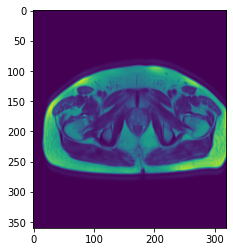

In [46]:
plt.imshow(img.pixel_array)

In [9]:
img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))

In [4]:
from skimage import io,viewer,exposure
from skimage.viewer.plugins.lineprofile import LineProfile
from skimage.viewer.plugins import Plugin
from skimage.viewer.widgets import Slider


img = io.imread(filePath,as_gray=True)
#img.shape
#img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))
viewer = viewer.ImageViewer(img)
viewer+=LineProfile(maxdist=100)
viewer.show()

C:\Users\Pier\AppData\Local\Temp/ipykernel_8500/2899840677.py:10: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  viewer = viewer.ImageViewer(img)


Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


[(array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([6.000e+00, 5.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
         1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.600e+01,
         4.850e+02, 1.301e+03, 2.046e+03, 2.342e+03, 2.327e+03, 2.159e+03,
         2.120e+03, 2.078e+03, 2.056e+03, 2.092e+03, 2.055e+03, 2.083e+03,
         2.106e+03, 2.082e+03, 1.991e+03, 1.942e+03, 1.945e+03, 1.922e+03,
         1.327e+03, 7.930e+02, 1.331e+03, 1.785e+03, 1.698e+03, 1.584e+03,
         1.168e+03, 8.150e+02, 6.160e+02, 5.850e+02, 5.870e+02, 3.850e+02,
         3.640e+02, 5.290e+02, 6.660e+02, 8.100e+02, 8.680e+02, 9.170e+02,
         8.850e+02, 7.820e+02, 6.960e+02, 6.620e+02, 5.620e+02, 4.280e+02,
         3.540e+02, 2.930e+02, 3.560e+02, 4.970e+02, 5.120e+02, 3.840e+02,
         6.100e+0

In [4]:
print(img.pixel_array.shape)
print("max: ",img.pixel_array.max(),"\nmin: ",img.pixel_array.min())
np.mean(img.pixel_array)

AttributeError: 'numpy.ndarray' object has no attribute 'pixel_array'

In [18]:
flat = img.pixel_array.flatten()
print(flat)

[0 0 0 ... 0 0 0]


In [50]:
np.histogram(img.pixel_array,bins=10)

(array([77203, 11305,  5050,  4414,  5375,  4497,  3932,  2502,   832,
           90], dtype=int64),
 array([   0. ,  293.3,  586.6,  879.9, 1173.2, 1466.5, 1759.8, 2053.1,
        2346.4, 2639.7, 2933. ]))

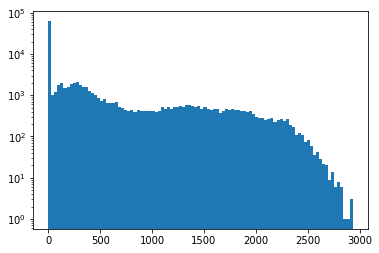

In [58]:

plt.hist(flat,bins=100,log=True,histtype="stepfilled")
plt.savefig('histograma.png')
plt.show()

In [60]:
from skimage.filters.rank import gradient
from skimage.morphology import disk

In [11]:
io.imsave("images\original.png",img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
out = gradient(img, disk(1))
io.imsave("bordes.png",out)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(out,cmap="gray")
